In [3]:
import pandas as pd
from os.path import join
figdir = f"/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/VVS_Accentuation/red_20241212-20241220/model_outputs"

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

def format_result_df(result_df, dimred_list=()):
    # format the result_df to be a dataframe with layer, dimred, regressor, train_score, test_score, parse the key index as layer_dimred, regressor , if it has column unnamed then rename it to layer_dimred, regressor
    """ if index is a multi-index, parse it as layer_dimred, regressor , if it has column unnamed then rename it to layer_dimred, regressor
    The latter case if possible when the frame is loaded from a csv file. 
    """
    if isinstance(result_df.index, pd.MultiIndex):
        result_df_formatted = result_df.reset_index()
        result_df_formatted.rename(columns={"level_0": "layer_dimred", "level_1": "regressor", }, inplace=True)
    else:
        result_df_formatted = result_df
        result_df_formatted.rename(columns={"Unnamed: 0": "layer_dimred", "Unnamed: 1": "regressor", }, inplace=True)
    
    def split_layer_dimred(x, dimred_list):
        for dimred in dimred_list:
            if x.endswith(dimred):
                # Split at the last _ before the dimred
                prefix = x[:-len(dimred)-1] # Remove dimred and the _
                return prefix, dimred
        raise ValueError(f"Could not find any matching dimred type in {dimred_list} for {x}")
    
    if not len(dimred_list) == 0:
        result_df_formatted["layer"], result_df_formatted["dimred"] = zip(*result_df_formatted["layer_dimred"].apply(lambda x: split_layer_dimred(x, dimred_list)))
    else:
        result_df_formatted["layer"] = result_df_formatted["layer_dimred"].apply(lambda x: x.split("_")[0])
        result_df_formatted["dimred"] = result_df_formatted["layer_dimred"].apply(lambda x: "_".join(x.split("_")[1:]))
    return result_df_formatted


def plot_result_df_per_layer(result_df, shorten_func=None, dimred_list=[], sharey=False, ylim=(None, None), grid=False):
    """
    Plot the result_df per layer, separated by train and test scores; 
    each line is a different dimred x regressor pair
    """
    if shorten_func is None:
        shorten_func = lambda x: x.replace("Bottleneck", "B").replace(".layer", "L")
    
    result_df_formatted = format_result_df(result_df, dimred_list)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=sharey)
    plt.sca(axs[0])
    sns.lineplot(data=result_df_formatted, x="layer", 
                y="train_score", style="regressor", hue="dimred", ax=axs[0], marker="o")
    plt.xticks(rotation=45)
    xticklabels = plt.gca().get_xticklabels()
    xticklabels = [shorten_func(label.get_text()) for label in xticklabels]
    plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45)
    plt.title("Training R2")
    plt.ylim(ylim[0], ylim[1])
    axs[0].grid(grid)
    
    plt.sca(axs[1])
    sns.lineplot(data=result_df_formatted, x="layer", 
                y="test_score", style="regressor", hue="dimred", ax=axs[1], marker="o")
    plt.xticks(rotation=45)
    xticklabels = plt.gca().get_xticklabels()
    xticklabels = [shorten_func(label.get_text()) for label in xticklabels]
    plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, rotation=45)
    plt.title("Test R2")
    plt.ylim(ylim[0], ylim[1])
    axs[1].grid(grid)
    plt.tight_layout()
    return fig

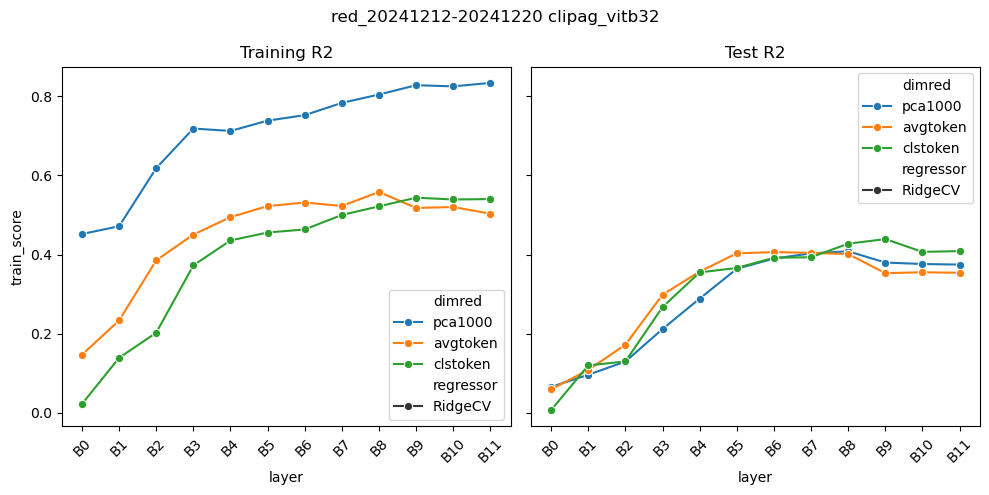

In [15]:
subject_id = f"red_20241212-20241220"
model_name = f"clipag_vitb32"
result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
layer_shorten_func = lambda x: x.replace(".transformer.resblocks.ResidualAttentionBlock", "B")
figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True)
figh.suptitle(f"{subject_id} | backbone: {model_name}")
figh.tight_layout()

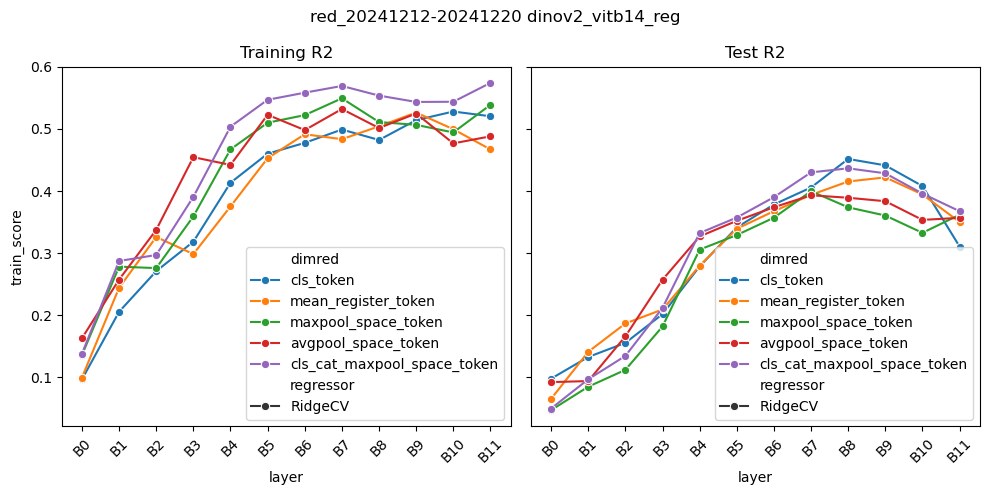

In [ ]:
subject_id = f"red_20241212-20241220"
model_name = f"dinov2_vitb14_reg"
result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
layer_shorten_func = lambda x: x.replace(".blocks.NestedTensorBlock", "B")
figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True)
figh.suptitle(f"{subject_id} | backbone: {model_name}")
figh.tight_layout()

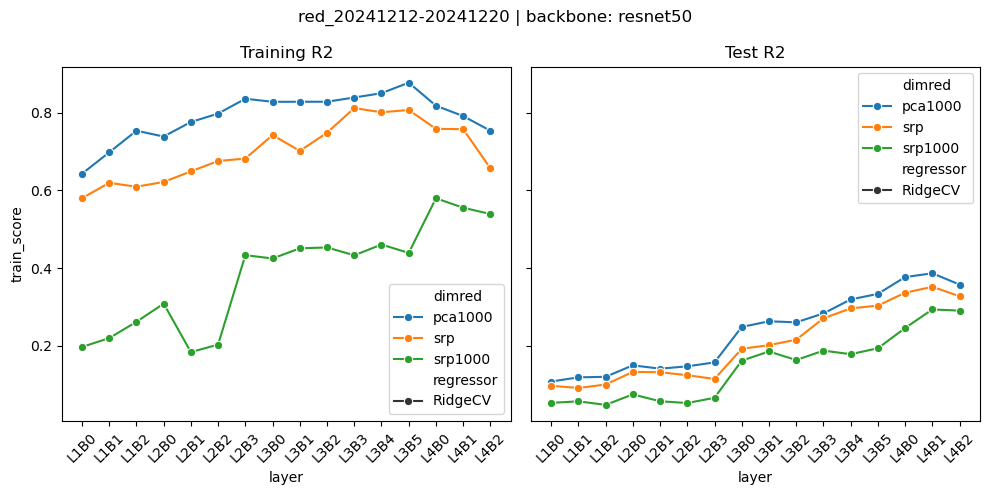

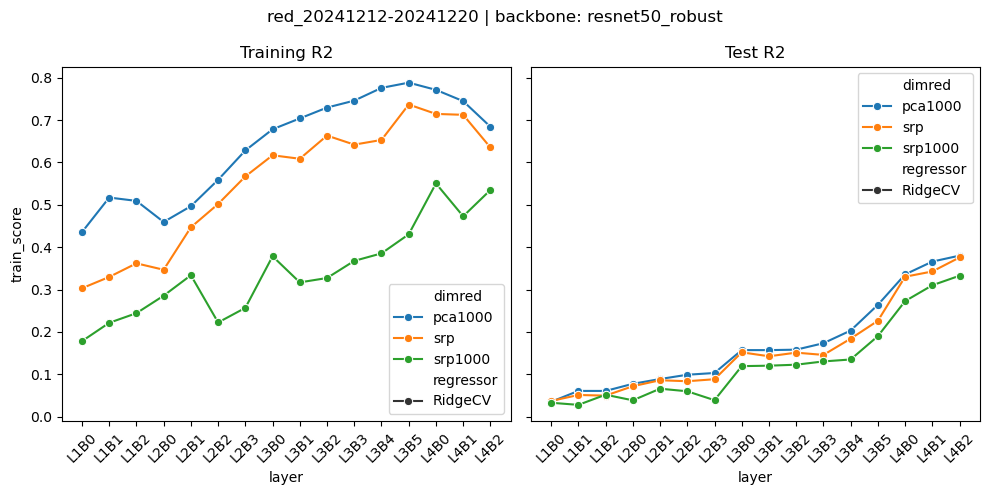

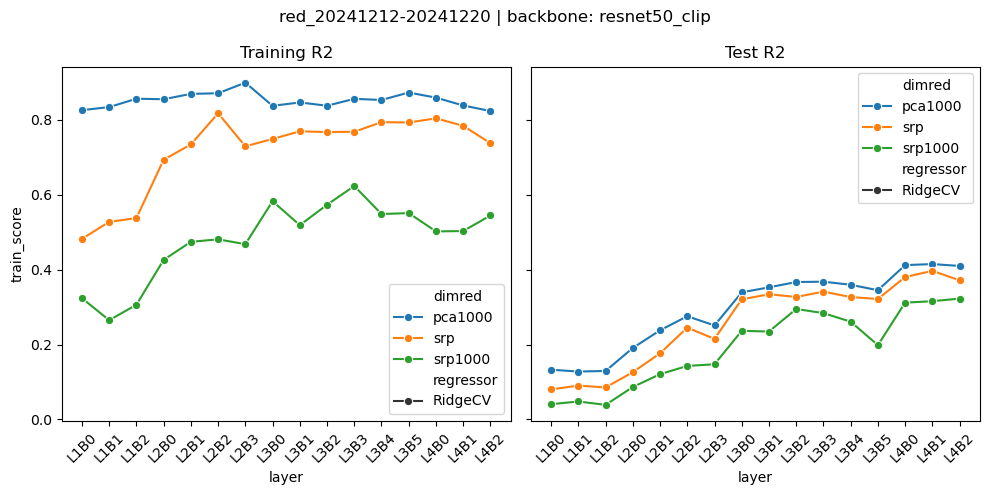

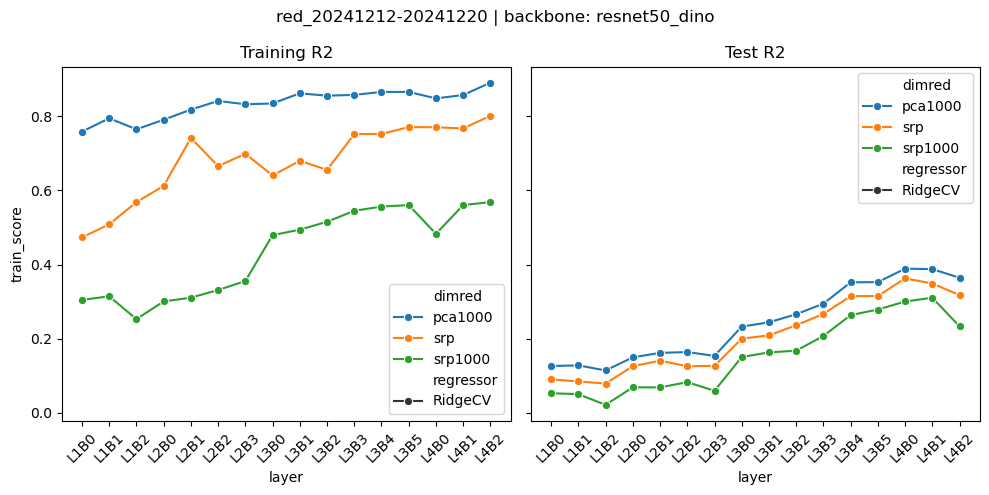

In [21]:
subject_id = f"red_20241212-20241220"
for model_name in ["resnet50", "resnet50_robust", "resnet50_clip", "resnet50_dino"]:
    result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
    layer_shorten_func = lambda x: x.replace(".Bottleneck", "B").replace(".layer", "L")
    figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True)
    figh.suptitle(f"{subject_id} | backbone: {model_name}")
    figh.tight_layout()
    figh.show()

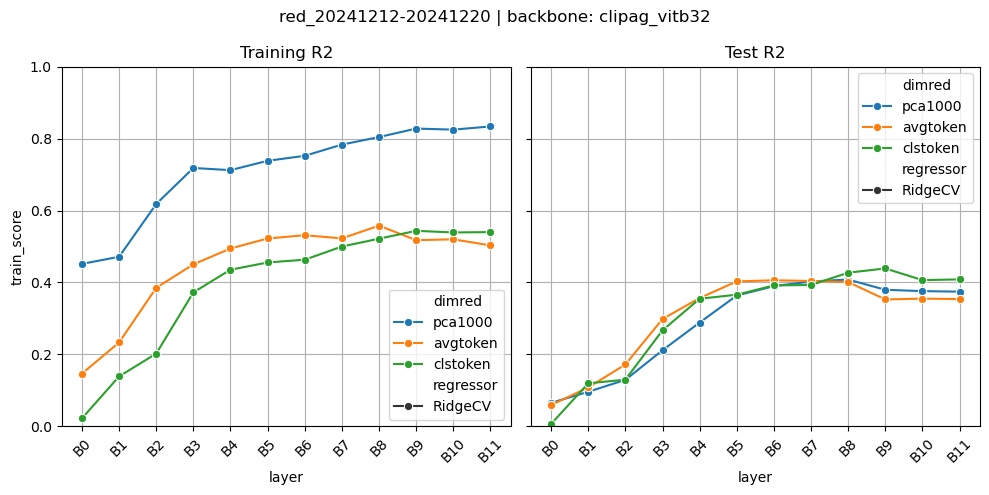

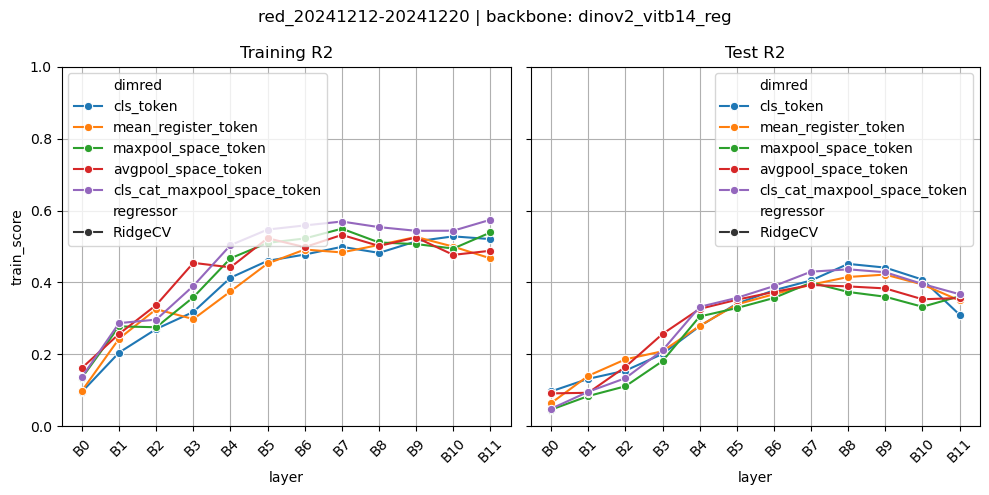

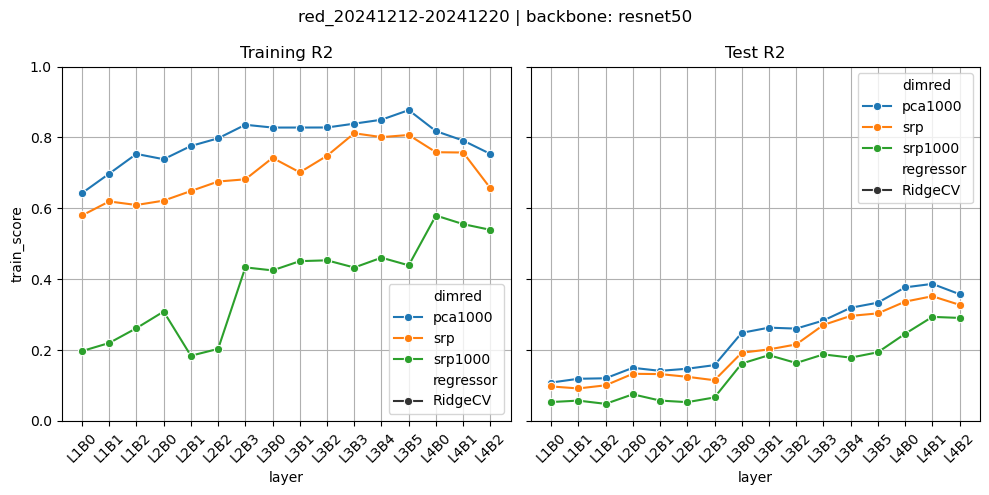

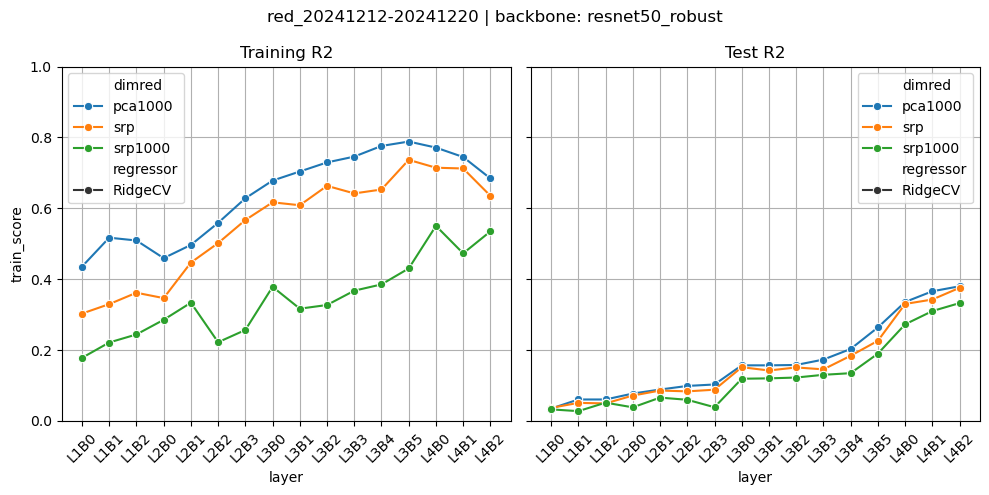

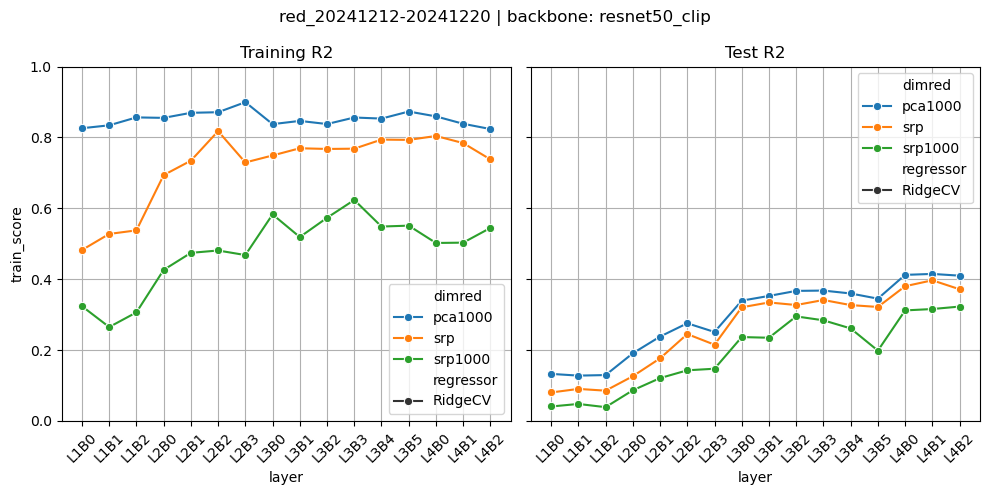

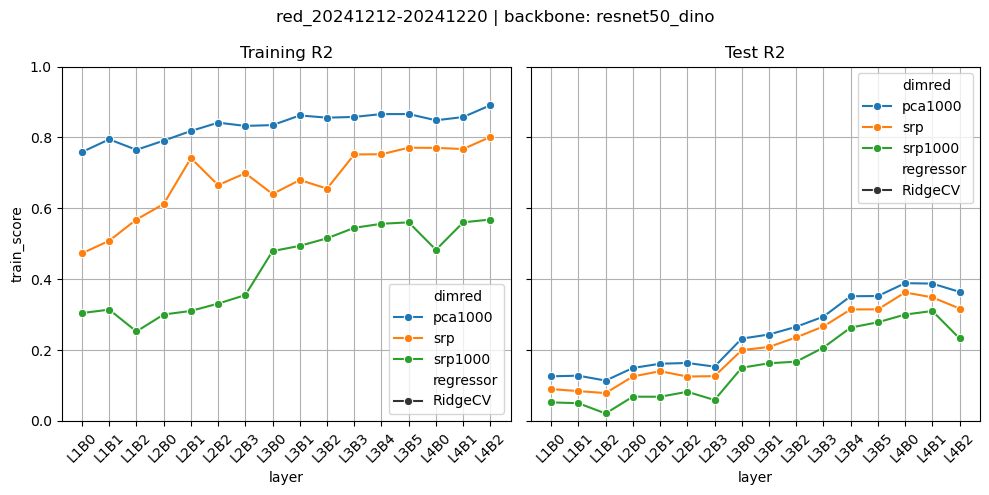

In [27]:
subject_id = f"red_20241212-20241220"

model_name = f"clipag_vitb32"
result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
layer_shorten_func = lambda x: x.replace(".transformer.resblocks.ResidualAttentionBlock", "B")
figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True, ylim=(0,1), grid=True)
figh.suptitle(f"{subject_id} | backbone: {model_name}")
figh.tight_layout()

model_name = f"dinov2_vitb14_reg"
result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
layer_shorten_func = lambda x: x.replace(".blocks.NestedTensorBlock", "B")
figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True, ylim=(0,1), grid=True)
figh.suptitle(f"{subject_id} | backbone: {model_name}")
figh.tight_layout()

for model_name in ["resnet50", "resnet50_robust", "resnet50_clip", "resnet50_dino"]:
    result_df = pd.read_csv(join(figdir, f"{subject_id}_{model_name}_sweep_regressors_layers_sweep_RidgeCV.csv"))
    layer_shorten_func = lambda x: x.replace(".Bottleneck", "B").replace(".layer", "L")
    figh = plot_result_df_per_layer(result_df, layer_shorten_func, sharey=True, ylim=(0,1), grid=True)
    figh.suptitle(f"{subject_id} | backbone: {model_name}")
    figh.tight_layout()
    figh.show()